Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [12]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

Load dataset

In [13]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)[[date_column, target_column]]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)

Create model

In [14]:
model = AutoTS(
    forecast_length=30,
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [15]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [16]:
print(model_lists["univariate"])

['ETS', 'PreprocessingRegression', 'ConstantNaive', 'UnobservedComponents', 'UnivariateRegression', 'LastValueNaive', 'AverageValueNaive', 'SeasonalNaive', 'GLM', 'FBProphet', 'GLS', 'NeuralProphet', 'KalmanStateSpace', 'SeasonalityMotif', 'UnivariateMotif', 'ARDL', 'DatepartRegression', 'MLEnsemble', 'Theta', 'ARCH', 'FFT', 'MetricMotif', 'ARIMA']


Train test split, fit and prediction

In [17]:
train = df.iloc[:-30]
test = df.iloc[-30:]
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24569D+00    |proj g|=  1.32184D-01

At iterate    1    f=  9.23606D+00    |proj g|=  8.56190D-02

At iterate    2    f=  9.23175D+00    |proj g|=  3.60918D-02

At iterate    3    f=  9.22996D+00    |proj g|=  1.71786D-02

At iterate    4    f=  9.22925D+00    |proj g|=  1.76672D-02

At iterate    5    f=  9.22829D+00    |proj g|=  1.23862D-02

At iterate    6    f=  9.22668D+00    |proj g|=  1.96964D-02

At iterate    7    f=  9.22467D+00    |proj g|=  2.29772D-02

At iterate    8    f=  9.22321D+00    |proj g|=  3.28913D-02

At iterate    9    f=  9.22118D+00    |proj g|=  5.38252D-02

At iterate   10    f=  9.21665D+00    |proj g|=  2.64541D-02

At iterate   11    f=  9.21303D+00    |proj g|=  3.92971D-02

At iterate   12    f=  9.20946D+00    |proj g|=  7.79027D-02

At iterate   13    f=  9.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Model Number: 6 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5
Epoch 1/50
43/43 [==============================] - 10s 7ms/step - loss: 0.3991
Epoch 2/50
43/43 [==============================] - 0s 9ms/step - loss: 0.3930
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3897
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3901
Epoch 5/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3903
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3878
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3882
Epoch 8/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3878
Epoch 9/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3875
Epoch 10/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3879
Epoch 11/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3873
Epoch 12/50
43/43 [==============================] - 0s 5ms/s

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 55 with model KalmanStateSpace in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 55 in generation 0: KalmanStateSpace
Model Number: 56 with model SeasonalityMotif in generation 0 of 5
Model Number: 57 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 57 in generation 0: UnivariateMotif
Model Number: 58 with model ARDL in generation 0 of 5
Model Number: 59 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 59 in generation 0: DatepartRegression
Model Number: 60 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 60 in generation 0: MLEnsemble
Model Number: 61 with model Theta in generation 0 of 5
Model Number: 62 with model ARCH in generation 0 of 5
Template E

 This problem is unconstrained.



At iterate    2    f=  9.76855D+00    |proj g|=  1.65632D-02

At iterate    3    f=  9.76586D+00    |proj g|=  6.46064D-03

At iterate    4    f=  9.76563D+00    |proj g|=  1.03008D-03

At iterate    5    f=  9.76562D+00    |proj g|=  6.08536D-04

At iterate    6    f=  9.76561D+00    |proj g|=  1.37563D-04

At iterate    7    f=  9.76561D+00    |proj g|=  1.37563D-04

At iterate    8    f=  9.76560D+00    |proj g|=  1.37564D-04

At iterate    9    f=  9.76560D+00    |proj g|=  3.08004D-04

At iterate   10    f=  9.76560D+00    |proj g|=  6.74057D-04

At iterate   11    f=  9.76558D+00    |proj g|=  1.22247D-03

At iterate   12    f=  9.76555D+00    |proj g|=  2.15814D-03

At iterate   13    f=  9.76545D+00    |proj g|=  3.69701D-03

At iterate   14    f=  9.76518D+00    |proj g|=  6.31455D-03

At iterate   15    f=  9.76447D+00    |proj g|=  1.07290D-02

At iterate   16    f=  9.76231D+00    |proj g|=  1.60211D-02

At iterate   17    f=  9.75988D+00    |proj g|=  5.13434D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 78 with model KalmanStateSpace in generation 0 of 5
Model Number: 79 with model ConstantNaive in generation 0 of 5
Model Number: 80 with model FBProphet in generation 0 of 5
Model Number: 81 with model Theta in generation 0 of 5
Model Number: 82 with model GLS in generation 0 of 5
Model Number: 83 with model SeasonalNaive in generation 0 of 5
Model Number: 84 with model ConstantNaive in generation 0 of 5
Model Number: 85 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 85 in generation 0: PreprocessingRegression
Model Number: 86 with model UnobservedComponents in generation 0 of 5
Model Number: 87 with model KalmanStateSpace in generation 0 of 5
Model Number: 88 with model UnivariateMotif in generation 0 of 5
Model Number: 89 with model Theta in generation 0 of 5
Model Number: 90 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions f

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 106 with model SeasonalityMotif in generation 0 of 5
Model Number: 107 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 107 in generation 0: MLEnsemble
Model Number: 108 with model ARDL in generation 0 of 5
Model Number: 109 with model DatepartRegression in generation 0 of 5
Model Number: 110 with model AverageValueNaive in generation 0 of 5
Model Number: 111 with model Theta in generation 0 of 5
Model Number: 112 with model KalmanStateSpace in generation 0 of 5
Model Number: 113 with model SeasonalNaive in generation 0 of 5
Model Number: 114 with model FFT in generation 0 of 5
Model Number: 115 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 115 in generation 0: PreprocessingRegre

 This problem is unconstrained.



At iterate    1    f=  7.84337D+05    |proj g|=  1.27399D+08

At iterate    2    f=  7.22179D+05    |proj g|=  1.12584D+08

At iterate    3    f=  4.22080D+05    |proj g|=  5.03821D+07

At iterate    4    f=  2.97208D+05    |proj g|=  2.97879D+07

At iterate    5    f=  1.95046D+05    |proj g|=  1.58815D+07

At iterate    6    f=  1.31145D+05    |proj g|=  8.78778D+06

At iterate    7    f=  8.70755D+04    |proj g|=  4.78151D+06

At iterate    8    f=  5.77921D+04    |proj g|=  2.60774D+06

At iterate    9    f=  3.80641D+04    |proj g|=  1.41226D+06

At iterate   10    f=  2.48625D+04    |proj g|=  7.60217D+05

At iterate   11    f=  1.60340D+04    |proj g|=  4.05212D+05

At iterate   12    f=  1.01675D+04    |proj g|=  2.13314D+05

At iterate   13    f=  6.30770D+03    |proj g|=  1.10544D+05

At iterate   14    f=  3.81118D+03    |proj g|=  5.62711D+04

At iterate   15    f=  2.23607D+03    |proj g|=  2.81226D+04

At iterate   16    f=  1.27358D+03    |proj g|=  1.38256D+04

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/samuell/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/samuell/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Model Number: 156 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 156 in generation 0: ARCH
Model Number: 157 with model ARDL in generation 0 of 5
New Generation: 1 of 5
Model Number: 158 with model LastValueNaive in generation 1 of 5
Model Number: 159 with model ConstantNaive in generation 1 of 5
Model Number: 160 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 160 in generation 1: ARDL
Model Number: 161 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 161 in generation 1: SeasonalNaive
Model Number: 162 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 162 in generation 1: FBProphet
Model Number: 163 with model AverageValueNaive in generation 1 of 5
Mo

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 191 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03817D+00    |proj g|=  6.07078D+00


 This problem is unconstrained.



At iterate    1    f= -1.37588D+00    |proj g|=  2.43888D+00

At iterate    2    f= -1.38522D+00    |proj g|=  4.74236D-01

At iterate    3    f= -1.41560D+00    |proj g|=  2.47888D+00

At iterate    4    f= -1.48389D+00    |proj g|=  4.93631D+00

At iterate    5    f= -1.51192D+00    |proj g|=  3.91184D-01

At iterate    6    f= -1.51335D+00    |proj g|=  2.49887D-01

At iterate    7    f= -1.51830D+00    |proj g|=  1.44243D-01

At iterate    8    f= -1.53473D+00    |proj g|=  2.79210D-01

At iterate    9    f= -1.53829D+00    |proj g|=  3.69336D-01

At iterate   10    f= -1.54225D+00    |proj g|=  5.33021D-01

At iterate   11    f= -1.54347D+00    |proj g|=  2.96100D-01

At iterate   12    f= -1.54405D+00    |proj g|=  6.86677D-02

At iterate   13    f= -1.54434D+00    |proj g|=  2.68462D-01

At iterate   14    f= -1.54513D+00    |proj g|=  6.23963D-01

At iterate   15    f= -1.54655D+00    |proj g|=  9.46316D-01

At iterate   16    f= -1.54804D+00    |proj g|=  4.66994D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2131: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)


Model Number: 244 with model UnobservedComponents in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 245 with model DatepartRegression in generation 1 of 5
Model Number: 246 with model FFT in generation 1 of 5
Model Number: 247 with model UnobservedComponents in generation 1 of 5
Model Number: 248 with model UnivariateMotif in generation 1 of 5
Model Number: 249 with model LastValueNaive in generation 1 of 5
Model Number: 250 with model LastValueNaive in generation 1 of 5
Model Number: 251 with model DatepartRegression in generation 1 of 5
Model Number: 252 with model ConstantNaive in generation 1 of 5
Model Number: 253 with model MetricMotif in generation 1 of 5
Model Number: 254 with model LastValueNaive in generation 1 of 5
Model Number: 255 with model AverageValueNaive in generation 1 of 5
Model Number: 256 with model UnivariateMotif in generation 1 of 5
Model Number: 257 with model ETS in generation 1 of 5
Model Number: 258 with model KalmanStateSpace in generation 1 of 5
Model Number: 259 with model SeasonalNaive in generation 1 of 5
Model Number: 260 with model Se

 This problem is unconstrained.



At iterate    1    f=  8.92848D+00    |proj g|=  2.66468D-02

At iterate    2    f=  8.92815D+00    |proj g|=  1.06659D-02

At iterate    3    f=  8.92808D+00    |proj g|=  5.23739D-03

At iterate    4    f=  8.92803D+00    |proj g|=  5.67829D-03

At iterate    5    f=  8.92791D+00    |proj g|=  8.63814D-03

At iterate    6    f=  8.92772D+00    |proj g|=  1.10252D-02

At iterate    7    f=  8.92726D+00    |proj g|=  1.89163D-02

At iterate    8    f=  8.92671D+00    |proj g|=  1.92827D-02

At iterate    9    f=  8.92600D+00    |proj g|=  2.59941D-02

At iterate   10    f=  8.92468D+00    |proj g|=  1.71431D-02

At iterate   11    f=  8.92414D+00    |proj g|=  9.90209D-03

At iterate   12    f=  8.92385D+00    |proj g|=  1.02600D-02

At iterate   13    f=  8.92346D+00    |proj g|=  7.36555D-03

At iterate   14    f=  8.92322D+00    |proj g|=  7.54098D-03

At iterate   15    f=  8.92314D+00    |proj g|=  1.04644D-02

At iterate   16    f=  8.92302D+00    |proj g|=  4.46187D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.26323D+00    |proj g|=  7.88923D-02

At iterate    2    f=  9.25967D+00    |proj g|=  2.41493D-02

At iterate    3    f=  9.25911D+00    |proj g|=  1.59456D-02

At iterate    4    f=  9.25854D+00    |proj g|=  1.69559D-02


Export model

In [ ]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [ ]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1028 with model LastValueNaive in generation 0 of 5
Model Number: 1029 with model SeasonalityMotif in generation 0 of 5


Model Number: 1030 with model AverageValueNaive in generation 0 of 5
Model Number: 1031 with model SeasonalNaive in generation 0 of 5
Model Number: 1032 with model ConstantNaive in generation 0 of 5
Model Number: 1033 with model UnivariateRegression in generation 0 of 5
Model Number: 1034 with model FBProphet in generation 0 of 5
Model Number: 1035 with model UnivariateMotif in generation 0 of 5
Model Number: 1036 with model Theta in generation 0 of 5
Model Number: 1037 with model ETS in generation 0 of 5
Model Number: 1038 with model FFT in generation 0 of 5
Model Number: 1039 with model DatepartRegression in generation 0 of 5
Model Number: 1040 with model GLS in generation 0 of 5
Model Number: 1041 with model UnobservedComponents in generation 0 of 5
Model Number: 1042 with model KalmanStateSpace in generation 0 of 5
Model Number: 1043 with model ARDL in generation 0 of 5
Model Number: 1044 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1046 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


New Generation: 1 of 5
Model Number: 1047 with model ConstantNaive in generation 1 of 5
Model Number: 1048 with model PreprocessingRegression in generation 1 of 5
Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 1048 in generation 1: PreprocessingRegression
Model Number: 1049 with model GLS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1050 with model Theta in generation 1 of 5
Model Number: 1051 with model FFT in generation 1 of 5
Model Number: 1052 with model ConstantNaive in generation 1 of 5
Model Number: 1053 with model Theta in generation 1 of 5
Model Number: 1054 with model SeasonalityMotif in generation 1 of 5
Model Number: 1055 with model Theta in generation 1 of 5
Model Number: 1056 with model SeasonalityMotif in generation 1 of 5
Model Number: 1057 with model LastValueNaive in generation 1 of 5
Model Number: 1058 with model SeasonalNaive in generation 1 of 5
Model Number: 1059 with model ConstantNaive in generation 1 of 5
Model Number: 1060 with model GLS in generation 1 of 5
Model Number: 1061 with model UnivariateMotif in generation 1 of 5
Model Number: 1062 with model DatepartRegression in generation 1 of 5
Epoch 1/50
Template Eval Error: InvalidArgumentError() in model 1062 in generation 1: DatepartRegression
Model Number: 1063 with model UnobservedComponents in generation 1 of 5
Model Nu

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1066 with model SeasonalNaive in generation 1 of 5
Model Number: 1067 with model SeasonalNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1068 with model ETS in generation 1 of 5
Model Number: 1069 with model ConstantNaive in generation 1 of 5
Model Number: 1070 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1070 in generation 1: ARDL
Model Number: 1071 with model LastValueNaive in generation 1 of 5
Model Number: 1072 with model PreprocessingRegression in generation 1 of 5
Model Number: 1073 with model FFT in generation 1 of 5
Model Number: 1074 with model LastValueNaive in generation 1 of 5
Model Number: 1075 with model UnivariateMotif in generation 1 of 5
Model Number: 1076 with model LastValueNaive in generation 1 of 5
Model Number: 1077 with model LastValueNaive in generation 1 of 5
Model Number: 1078 with model PreprocessingRegression in generation 1 of 5
Model Number: 1079 with model Theta in generation 1 of 5
Model Number: 1080 with model PreprocessingRegression in generation 1 of 5
Model Number: 1081 with model LastValueNa

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1112 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.10756D-01    |proj g|=  1.06049D+00


 This problem is unconstrained.



At iterate    1    f= -6.49044D-01    |proj g|=  1.33983D+00

At iterate    2    f= -7.18166D-01    |proj g|=  6.09209D+00

At iterate    3    f= -8.68400D-01    |proj g|=  1.05801D+01

At iterate    4    f= -9.98413D-01    |proj g|=  4.86689D+00

At iterate    5    f= -1.03639D+00    |proj g|=  2.58592D+00

At iterate    6    f= -1.05478D+00    |proj g|=  1.44659D+00

At iterate    7    f= -1.05981D+00    |proj g|=  8.33052D-01

At iterate    8    f= -1.06156D+00    |proj g|=  2.93441D-01

At iterate    9    f= -1.06555D+00    |proj g|=  2.77101D-01

At iterate   10    f= -1.07788D+00    |proj g|=  2.40246D-01

At iterate   11    f= -1.10272D+00    |proj g|=  5.95495D-01

At iterate   12    f= -1.11160D+00    |proj g|=  3.80129D-01

At iterate   13    f= -1.11623D+00    |proj g|=  6.87724D-02

At iterate   14    f= -1.11895D+00    |proj g|=  9.09627D-02

At iterate   15    f= -1.12096D+00    |proj g|=  1.22212D-01

At iterate   16    f= -1.12136D+00    |proj g|=  3.17232D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1120 with model MetricMotif in generation 1 of 5
Model Number: 1121 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1122 with model SeasonalityMotif in generation 1 of 5
Model Number: 1123 with model SeasonalityMotif in generation 1 of 5
Model Number: 1124 with model UnivariateMotif in generation 1 of 5
Model Number: 1125 with model SeasonalNaive in generation 1 of 5
Model Number: 1126 with model ETS in generation 1 of 5
Model Number: 1127 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1127 in generation 1: UnivariateRegression
Model Number: 1128 with model SeasonalNaive in generation 1 of 5
Model Number: 1129 with model Theta in generation 1 of 5
Model Number: 1130 with model LastValueNaive in generation 1 of 5
Model Number: 1131 with model ETS in generation 1 of 5
Model Number: 1132 with model AverageValueNaive in generation 1 of 5
Model Number: 1133 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 This problem is unconstrained.



At iterate   14    f= -1.24551D+00    |proj g|=  1.06685D+00

At iterate   15    f= -1.26307D+00    |proj g|=  6.02787D-01

At iterate   16    f= -1.28204D+00    |proj g|=  3.17541D-01

At iterate   17    f= -1.29390D+00    |proj g|=  1.84494D-01

At iterate   18    f= -1.30060D+00    |proj g|=  3.35833D-01

At iterate   19    f= -1.30457D+00    |proj g|=  1.08933D-01

At iterate   20    f= -1.30711D+00    |proj g|=  3.46321D-02

At iterate   21    f= -1.30854D+00    |proj g|=  3.18419D-02

At iterate   22    f= -1.30858D+00    |proj g|=  1.76139D-02

At iterate   23    f= -1.30931D+00    |proj g|=  9.02168D-03

At iterate   24    f= -1.30931D+00    |proj g|=  3.07339D-02

At iterate   25    f= -1.30967D+00    |proj g|=  2.41365D-02

At iterate   26    f= -1.30977D+00    |proj g|=  5.25246D-03

At iterate   27    f= -1.30995D+00    |proj g|=  1.17868D-02

At iterate   28    f= -1.31002D+00    |proj g|=  5.42944D-03

At iterate   29    f= -1.31003D+00    |proj g|=  2.47343D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.57499D+00    |proj g|=  2.58064D+00

At iterate    2    f= -3.57527D+00    |proj g|=  2.57278D+00

At iterate    3    f= -3.57573D+00    |proj g|=  3.37544D+00

At iterate    4    f= -3.57726D+00    |proj g|=  8.30050D+00

At iterate    5    f= -3.57911D+00    |proj g|=  9.52999D+00

At iterate    6    f= -3.58102D+00    |proj g|=  3.95082D+00

At iterate    7    f= -3.58150D+00    |proj g|=  8.49715D-01

At iterate    8    f= -3.58163D+00    |proj g|=  2.15479D+00

At iterate    9    f= -3.58189D+00    |proj g|=  4.37620D+00

At iterate   10    f= -3.58250D+00    |proj g|=  7.68168D+00

At iterate   11    f= -3.58407D+00    |proj g|=  1.27889D+01

At iterate   12    f= -3.58796D+00    |proj g|=  2.02687D+01

At iterate   13    f= -3.59732D+00    |proj g|=  3.06189D+01

At iterate   14    f= -3.61858D+00    |proj g|=  4.35761D+01

At iterate   15    f= -3.66276D+00    |proj g|=  5.75996D+01

At iterate   16    f= -3.74648D+00    |proj g|=  6.92833D+01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1171 with model DatepartRegression in generation 2 of 5
Model Number: 1172 with model Theta in generation 2 of 5
Model Number: 1173 with model GLS in generation 2 of 5
Model Number: 1174 with model SeasonalityMotif in generation 2 of 5
Model Number: 1175 with model SeasonalNaive in generation 2 of 5
Model Number: 1176 with model SeasonalityMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1177 with model AverageValueNaive in generation 2 of 5
Model Number: 1178 with model UnivariateMotif in generation 2 of 5
Model Number: 1179 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.96618D-02    |proj g|=  7.61700D-01

At iterate    1    f= -1.18338D+00    |proj g|=  1.14440D+00
  ys=-6.930E-02  -gs= 8.143E-01 BFGS update SKIPPED

At iterate    2    f= -1.18637D+00    |proj g|=  1.16819D+00


 This problem is unconstrained.



At iterate    3    f= -1.21549D+00    |proj g|=  3.78095D+00

At iterate    4    f= -1.24330D+00    |proj g|=  4.28061D+00

At iterate    5    f= -1.31256D+00    |proj g|=  1.66189D+00

At iterate    6    f= -1.31587D+00    |proj g|=  5.21287D-01

At iterate    7    f= -1.31636D+00    |proj g|=  1.09571D-01

At iterate    8    f= -1.31643D+00    |proj g|=  1.00121D-01

At iterate    9    f= -1.31665D+00    |proj g|=  1.58147D-01

At iterate   10    f= -1.31714D+00    |proj g|=  4.07641D-01

At iterate   11    f= -1.31822D+00    |proj g|=  7.11078D-01

At iterate   12    f= -1.31994D+00    |proj g|=  8.51836D-01

At iterate   13    f= -1.32156D+00    |proj g|=  5.41540D-01

At iterate   14    f= -1.32204D+00    |proj g|=  1.30660D-01

At iterate   15    f= -1.32208D+00    |proj g|=  2.54952D-02

At iterate   16    f= -1.32209D+00    |proj g|=  3.24493D-02

At iterate   17    f= -1.32210D+00    |proj g|=  5.64141D-02

At iterate   18    f= -1.32214D+00    |proj g|=  9.90414D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



Model Number: 1217 with model SeasonalNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1217 in generation 2: SeasonalNaive
Model Number: 1218 with model ConstantNaive in generation 2 of 5
Model Number: 1219 with model Theta in generation 2 of 5
Model Number: 1220 with model UnobservedComponents in generation 2 of 5
Model Number: 1221 with model FFT in generation 2 of 5
Model Number: 1222 with model FBProphet in generation 2 of 5
Model Number: 1223 with model SeasonalNaive in generation 2 of 5
Model Number: 1224 with model AverageValueNaive in generation 2 of 5
Model Number: 1225 with model PreprocessingRegression in generation 2 of 5
Model Number: 1226 with model MetricMotif in generation 2 of 5
Model Number: 1227 with model FBProphet in generation 2 of 5
Model Number: 1228 with model SeasonalityMotif in generation 2 of 5
Model Number: 1229 with model ConstantNaive in generation 2 of 5
Model Number: 1230 with model Last

 This problem is unconstrained.



At iterate    2    f= -7.21696D-01    |proj g|=  2.10166D+00

At iterate    3    f= -7.72095D-01    |proj g|=  1.96007D+00

At iterate    4    f= -9.88951D-01    |proj g|=  7.18921D+00

At iterate    5    f= -1.00598D+00    |proj g|=  3.20285D+00

At iterate    6    f= -1.03447D+00    |proj g|=  1.81223D+00

At iterate    7    f= -1.04308D+00    |proj g|=  3.29950D-01

At iterate    8    f= -1.04380D+00    |proj g|=  1.80453D-01

At iterate    9    f= -1.04582D+00    |proj g|=  2.81379D-01

At iterate   10    f= -1.05259D+00    |proj g|=  3.29689D-01

At iterate   11    f= -1.06561D+00    |proj g|=  4.08559D-01

At iterate   12    f= -1.08120D+00    |proj g|=  7.80234D-01

At iterate   13    f= -1.08585D+00    |proj g|=  5.26158D-02

At iterate   14    f= -1.08622D+00    |proj g|=  1.32052D-01

At iterate   15    f= -1.08632D+00    |proj g|=  5.27197D-02

At iterate   16    f= -1.08643D+00    |proj g|=  6.20659D-02

At iterate   17    f= -1.08659D+00    |proj g|=  1.51267D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1282 with model PreprocessingRegression in generation 3 of 5
Model Number: 1283 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1283 in generation 3: FFT
Model Number: 1284 with model AverageValueNaive in generation 3 of 5
Model Number: 1285 with model MetricMotif in generation 3 of 5
Model Number: 1286 with model SeasonalityMotif in generation 3 of 5
Model Number: 1287 with model GLS in generation 3 of 5
Model Number: 1288 with model LastValueNaive in generation 3 of 5
Model Number: 1289 with model LastValueNaive in generation 3 of 5
Model Number: 1290 with model UnivariateMotif in generation 3 of 5
Model Number: 1291 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1292 with model UnivariateRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1292 in generation 3: UnivariateRegression
Model Number: 1293 with model PreprocessingRegression in generation 3 of 5
Model Number: 1294 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1294 in generation 3: PreprocessingRegression
Model Number: 1295 with model FBProphet in generation 3 of 5
Model Number: 1296 with model FFT in generation 3 of 5
Model Number: 1297 with model GLM in generation 3 of 5
Model Number: 1298 with model AverageValueNaive in generation 3 of 5
Model Number: 1299 with model SeasonalNaive in generation 3 of 5
Model Number: 1300 with model ConstantNaive in generation 3 of 5
Model Number: 1301 with model AverageValueNaive in generation 3 of 5
Model Number: 1302 with model AverageValueNaive in generation 3 of 5
Mod

 This problem is unconstrained.



At iterate    9    f= -1.50274D+00    |proj g|=  8.91439D-01

At iterate   10    f= -1.50899D+00    |proj g|=  2.87359D+00

At iterate   11    f= -1.50931D+00    |proj g|=  3.03391D+00

At iterate   12    f= -1.51157D+00    |proj g|=  2.76251D+00

At iterate   13    f= -1.51749D+00    |proj g|=  9.13176D-01

At iterate   14    f= -1.51855D+00    |proj g|=  3.48670D-01

At iterate   15    f= -1.51873D+00    |proj g|=  3.07664D-01

At iterate   16    f= -1.51951D+00    |proj g|=  5.10011D-02

At iterate   17    f= -1.52053D+00    |proj g|=  2.63457D-01

At iterate   18    f= -1.52203D+00    |proj g|=  8.48662D-02

At iterate   19    f= -1.52968D+00    |proj g|=  8.46709D-01

At iterate   20    f= -1.53233D+00    |proj g|=  4.15534D-01

At iterate   21    f= -1.53268D+00    |proj g|=  4.45127D-02

At iterate   22    f= -1.53273D+00    |proj g|=  7.00280D-02

At iterate   23    f= -1.53295D+00    |proj g|=  1.83315D-01

At iterate   24    f= -1.53366D+00    |proj g|=  4.72585D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1338 with model AverageValueNaive in generation 3 of 5
Model Number: 1339 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73220D+00    |proj g|=  2.00033D+00


 This problem is unconstrained.



At iterate    1    f= -1.79892D+00    |proj g|=  5.92391D+00

At iterate    2    f= -1.80904D+00    |proj g|=  2.61855D+00

At iterate    3    f= -1.82575D+00    |proj g|=  1.71670D+00

At iterate    4    f= -1.82720D+00    |proj g|=  7.02508D-02

At iterate    5    f= -1.82723D+00    |proj g|=  2.59555D-02

At iterate    6    f= -1.82727D+00    |proj g|=  2.54116D-02

At iterate    7    f= -1.82741D+00    |proj g|=  4.40150D-02

At iterate    8    f= -1.82764D+00    |proj g|=  5.73041D-02

At iterate    9    f= -1.82803D+00    |proj g|=  7.60976D-02

At iterate   10    f= -1.82864D+00    |proj g|=  4.23085D-02

At iterate   11    f= -1.82888D+00    |proj g|=  1.17550D-02

At iterate   12    f= -1.82899D+00    |proj g|=  2.55545D-02

At iterate   13    f= -1.82909D+00    |proj g|=  3.45521D-02

At iterate   14    f= -1.82925D+00    |proj g|=  2.14940D-01

At iterate   15    f= -1.82934D+00    |proj g|=  1.68622D-01

At iterate   16    f= -1.82946D+00    |proj g|=  2.66555D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1366 with model SeasonalityMotif in generation 3 of 5
Model Number: 1367 with model UnivariateMotif in generation 3 of 5
Model Number: 1368 with model AverageValueNaive in generation 3 of 5
Model Number: 1369 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 2') in model 1369 in generation 3: PreprocessingRegression
Model Number: 1370 with model UnobservedComponents in generation 3 of 5
Model Number: 1371 with model MetricMotif in generation 3 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1371 in generation 3: MetricMotif
Model Number: 1372 with model SeasonalNaive in generation 3 of 5
Model Number: 1373 with model SeasonalNaive in generation 3 of 5
Model Number: 1374 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1375 with model PreprocessingRegression in generation 3 of 5
Model Number: 1376 with model Theta in generation 3 of 5
Template Eval Error: Exception('Transformer PCA failed on inverse') in model 1376 in generation 3: Theta
Model Number: 1377 with model SeasonalNaive in generation 3 of 5
Model Number: 1378 with model SeasonalityMotif in generation 3 of 5
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 1378 in generation 3: SeasonalityMotif
Model Number: 1379 with model SeasonalityMotif in generation 3 of 5
Model Number: 1380 with model FBProphet in generation 3 of 5
Model Number: 1381 with model UnivariateRegression in generation 3 of 5
Model Number: 1382 with model GLM in generation 3 of 5
Model Number: 1383 with model SeasonalNaive in generation 3 of 5
Model Number: 1384 with model SeasonalNaive in generation 3 of 5
Model Number: 1385 with model SeasonalNaive in generation 3 of 5
Model Number: 1386 with model KalmanStateSpace 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 1387 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1387 in generation 3: PreprocessingRegression
Model Number: 1388 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1388 in generation 3: UnobservedComponents
Model Number: 1389 with model KalmanStateSpace in generation 3 of 5
Model Number: 1390 with model LastValueNaive in generation 3 of 5
Model Number: 1391 with model MetricMotif in generation 3 of 5
New Generation: 4 of 5
Model Number: 1392 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1392 in generation 4: AverageValueNaive
Model Number: 1393 with model SeasonalityMotif in generation 4 of 5
Model Number: 1394 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transfor

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1404 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1404 in generation 4: ARIMA
Model Number: 1405 with model SeasonalNaive in generation 4 of 5
Model Number: 1406 with model FBProphet in generation 4 of 5
Model Number: 1407 with model SeasonalityMotif in generation 4 of 5
Model Number: 1408 with model Theta in generation 4 of 5
Model Number: 1409 with model UnivariateMotif in generation 4 of 5
Model Number: 1410 with model FFT in generation 4 of 5
Model Number: 1411 with model LastValueNaive in generation 4 of 5
Model Number: 1412 with model SeasonalNaive in generation 4 of 5
Model Number: 1413 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1414 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1414 in generation 4: MetricMotif
Model Number: 1415 with model PreprocessingRegression in generation 4 of 5
Model Number: 1416 with model ARIMA in generation 4 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1416 in generation 4: ARIMA
Model Number: 1417 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1417 in generation 4: ARIMA
Model Number: 1418 with model ConstantNaive in generation 4 of 5
Model Number: 1419 with model MetricMotif in generation 4 of 5
Model Number: 1420 with model FBProphet in generation 4 of 5
Model Number: 1421 with model FBProphet in generation 4 of 5
Model Number: 1422 with model UnivariateMotif in generation 4 of 5
Model Number: 1423 with model MetricMotif in generation 4 of 5
Model

/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2131: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  

Model Number: 1432 with model UnivariateMotif in generation 4 of 5
Model Number: 1433 with model SeasonalityMotif in generation 4 of 5
Model Number: 1434 with model MetricMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 1435 with model ETS in generation 4 of 5
Model Number: 1436 with model FBProphet in generation 4 of 5
Model Number: 1437 with model ETS in generation 4 of 5
Model Number: 1438 with model SeasonalNaive in generation 4 of 5
Model Number: 1439 with model PreprocessingRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1439 in generation 4: PreprocessingRegression
Model Number: 1440 with model GLS in generation 4 of 5
Model Number: 1441 with model LastValueNaive in generation 4 of 5
Model Number: 1442 with model UnobservedComponents in generation 4 of 5
Model Number: 1443 with model SeasonalNaive in generation 4 of 5
Model Number: 1444 with model AverageValueNaive in generation 4 of 5
Model Number: 1445 with model LastValueNaive in generation 4 of 5
Model Number: 1446 with model AverageValueNaive in generation 4 of 5
Model Number: 1447 with model DatepartRegression in generation 4 of 5
Model Number: 1448 with model Se

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1461 with model FFT in generation 4 of 5
Model Number: 1462 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58382D+00    |proj g|=  1.46584D-01

At iterate    1    f=  4.53747D+00    |proj g|=  3.15747D-02

At iterate    2    f=  4.53368D+00    |proj g|=  8.37125D-03

At iterate    3    f=  4.53296D+00    |proj g|=  6.41416D-03

At iterate    4    f=  4.53235D+00    |proj g|=  6.40807D-03

At iterate    5    f=  4.52956D+00    |proj g|=  1.91154D-02

At iterate    6    f=  4.52650D+00    |proj g|=  2.23891D-02

At iterate    7    f=  4.52386D+00    |proj g|=  7.22075D-03

At iterate    8    f=  4.52349D+00    |proj g|=  1.59325D-03

At iterate    9    f=  4.52340D+00    |proj g|=  3.60796D-03

At iterate   10    f=  4.52326D+00    |proj g|=  6.02839D-03

At iterate   11    f=  4.52290D+00    

 This problem is unconstrained.



At iterate   21    f=  4.52037D+00    |proj g|=  2.48359D-05

At iterate   22    f=  4.52037D+00    |proj g|=  2.99760D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   2.998D-07   4.520D+00
  F =   4.5203712212311347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1463 with model LastValueNaive in generation 4 of 5
Model Number: 1464 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1465 with model UnivariateMotif in generation 4 of 5
Model Number: 1466 with model Theta in generation 4 of 5
Model Number: 1467 with model GLS in generation 4 of 5
Model Number: 1468 with model PreprocessingRegression in generation 4 of 5
Model Number: 1469 with model ConstantNaive in generation 4 of 5
Model Number: 1470 with model SeasonalityMotif in generation 4 of 5
Model Number: 1471 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1471 in generation 4: UnivariateRegression
Model Number: 1472 with model Theta in generation 4 of 5
Model Number: 1473 with model SeasonalNaive in generation 4 of 5
Model Number: 1474 with model SeasonalNaive in generation 4 of 5
Model Number: 1475 with model UnobservedComponents in generation 4 of 5
Model Number: 1476 with model GLM in generation 4 of 5
Model Number: 1477 with model UnivariateMotif in generation 4 of 5
Model Number: 1478 with model GLM in 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1494 with model LastValueNaive in generation 4 of 5
Model Number: 1495 with model FFT in generation 4 of 5
Model Number: 1496 with model AverageValueNaive in generation 4 of 5
Model Number: 1497 with model SeasonalNaive in generation 4 of 5
Model Number: 1498 with model ConstantNaive in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1498 in generation 4: ConstantNaive
Model Number: 1499 with model UnobservedComponents in generation 4 of 5
Model Number: 1500 with model SeasonalityMotif in generation 4 of 5
Model Number: 1501 with model GLS in generation 4 of 5
Model Number: 1502 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1502 in generation 4: AverageValueNaive
Model Number: 1503 with model UnivariateMotif in generation 4 of 5
Model Number: 1504 with model ETS in generation 4 of 5
Model Number: 1505 with model LastValueNaive in 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1555 with model LastValueNaive in generation 5 of 5
Model Number: 1556 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1556 in generation 5: MetricMotif
Model Number: 1557 with model PreprocessingRegression in generation 5 of 5
Model Number: 1558 with model ConstantNaive in generation 5 of 5
Model Number: 1559 with model GLM in generation 5 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1559 in generation 5: GLM
Model Number: 1560 with model Theta in generation 5 of 5
Model Number: 1561 with model FBProphet in generation 5 of 5
Model Number: 1562 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.58442D+00    |proj g|=  2.62880D+00

At iterate    1    f= -3.58

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1564 with model UnobservedComponents in generation 5 of 5
Model Number: 1565 with model SeasonalityMotif in generation 5 of 5
Model Number: 1566 with model PreprocessingRegression in generation 5 of 5
Model Number: 1567 with model SeasonalityMotif in generation 5 of 5
Model Number: 1568 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1568 in generation 5: UnivariateRegression
Model Number: 1569 with model UnivariateMotif in generation 5 of 5
Model Number: 1570 with model ARDL in generation 5 of 5
Model Number: 1571 with model SeasonalNaive in generation 5 of 5
Model Number: 1572 with model LastValueNaive in generation 5 of 5
Model Number: 1573 with model FBProphet in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1573 in generation 5: FBProphet
Model Number: 1574 with model GLM in generation 5 of 5
Model Number: 1575 with model Co

 This problem is unconstrained.



At iterate    1    f= -3.55727D+00    |proj g|=  1.82445D+01

At iterate    2    f= -3.56047D+00    |proj g|=  1.16928D+01

At iterate    3    f= -3.56270D+00    |proj g|=  3.50443D+00

At iterate    4    f= -3.56309D+00    |proj g|=  3.27321D+00

At iterate    5    f= -3.56475D+00    |proj g|=  4.03545D+00

At iterate    6    f= -3.56759D+00    |proj g|=  8.62771D+00

At iterate    7    f= -3.57041D+00    |proj g|=  8.22035D+00

At iterate    8    f= -3.57237D+00    |proj g|=  9.54600D-01

At iterate    9    f= -3.57289D+00    |proj g|=  3.99458D+00

At iterate   10    f= -3.57336D+00    |proj g|=  6.45933D+00

At iterate   11    f= -3.57571D+00    |proj g|=  1.48267D+01

At iterate   12    f= -3.58062D+00    |proj g|=  2.59359D+01

At iterate   13    f= -3.59511D+00    |proj g|=  4.85617D+01

At iterate   14    f= -3.62880D+00    |proj g|=  8.32563D+01

At iterate   15    f= -3.70582D+00    |proj g|=  1.17855D+02

At iterate   16    f= -3.82606D+00    |proj g|=  7.06777D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


45 - FBProphet with avg smape 70.75: 
Model Number: 46 of 106 with model FBProphet for Validation 1
46 - FBProphet with avg smape 115.38: 
Model Number: 47 of 106 with model GLS for Validation 1
47 - GLS with avg smape 88.14: 
Model Number: 48 of 106 with model GLM for Validation 1
48 - GLM with avg smape 91.17: 
Model Number: 49 of 106 with model AverageValueNaive for Validation 1
49 - AverageValueNaive with avg smape 70.17: 
Model Number: 50 of 106 with model ETS for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


50 - ETS with avg smape 90.95: 
Model Number: 51 of 106 with model GLS for Validation 1
51 - GLS with avg smape 91.07: 
Model Number: 52 of 106 with model GLS for Validation 1
52 - GLS with avg smape 91.07: 
Model Number: 53 of 106 with model GLS for Validation 1
53 - GLS with avg smape 91.07: 
Model Number: 54 of 106 with model GLS for Validation 1
54 - GLS with avg smape 91.07: 
Model Number: 55 of 106 with model AverageValueNaive for Validation 1
55 - AverageValueNaive with avg smape 132.17: 
Model Number: 56 of 106 with model FFT for Validation 1
56 - FFT with avg smape 104.16: 
Model Number: 57 of 106 with model GLS for Validation 1
57 - GLS with avg smape 88.01: 
Model Number: 58 of 106 with model Theta for Validation 1
58 - Theta with avg smape 90.17: 
Model Number: 59 of 106 with model GLM for Validation 1
59 - GLM with avg smape 90.31: 
Model Number: 60 of 106 with model GLM for Validation 1
60 - GLM with avg smape 90.31: 
Model Number: 61 of 106 with model ETS for Validation 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 63 - FBProphet with avg smape 28.72: 
Model Number: 64 of 106 with model Theta for Validation 1
64 - Theta with avg smape 95.61: 
Model Number: 65 of 106 with model Theta for Validation 1
65 - Theta with avg smape 86.63: 
Model Number: 66 of 106 with model Theta for Validation 1
66 - Theta with avg smape 96.56: 
Model Number: 67 of 106 with model UnobservedComponents for Validation 1
67 - UnobservedComponents with avg smape 90.95: 
Model Number: 68 of 106 with model Theta for Validation 1
68 - Theta with avg smape 90.21: 
Model Number: 69 of 106 with model ETS for Validation 1
69 - ETS with avg smape 100.25: 
Model Number: 70 of 106 with model FBProphet for Validation 1
70 - FBProphet with avg smape 89.55: 
Model Number: 71 of 106 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 31.17: 
Model Number: 72 of 106 with model ConstantNaive for Validation 1
72 - ConstantNaive with avg smape 31.17: 
Model Number: 73 of 106 with model ConstantNaive for Validation 1

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   45    f= -3.62417D+00    |proj g|=  7.55923D+00

At iterate   46    f= -3.62727D+00    |proj g|=  1.85196D+01

At iterate   47    f= -3.63488D+00    |proj g|=  9.33130D+00

At iterate   48    f= -3.63953D+00    |proj g|=  6.38893D-01

At iterate   49    f= -3.64058D+00    |proj g|=  2.05911D+00

At iterate   50    f= -3.64096D+00    |proj g|=  6.28381D-01

At iterate   51    f= -3.64277D+00    |proj g|=  1.19164D+00

At iterate   52    f= -3.64835D+00    |proj g|=  5.36191D+00

At iterate   53    f= -3.65472D+00    |proj g|=  1.66721D+00

At iterate   54    f= -3.65919D+00    |proj g|=  1.61326D+00

At iterate   55    f= -3.66179D+00    |proj g|=  3.33125D+00

At iterate   56    f= -3.66377D+00    |proj g|=  1.13834D+00

At iterate   57    f= -3.66564D+00    |proj g|=  2.92581D+00

At iterate   58    f= -3.66760D+00    |proj g|=  3.57339D+00

At iterate   59    f= -3.66847D+00    |proj g|=  8.18925D-01

At iterate   60    f= -3.66912D+00    |proj g|=  8.74738D-01

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



Model Number: 96 of 106 with model GLM for Validation 1
96 - GLM with avg smape 78.81: 
Model Number: 97 of 106 with model GLM for Validation 1
97 - GLM with avg smape 78.9: 
Model Number: 98 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02203D+00    |proj g|=  1.47027D-01

At iterate    1    f=  4.97520D+00    |proj g|=  3.07688D-02

At iterate    2    f=  4.97167D+00    |proj g|=  8.18272D-03

At iterate    3    f=  4.97119D+00    |proj g|=  4.27411D-03

At iterate    4    f=  4.97094D+00    |proj g|=  4.22168D-03

At iterate    5    f=  4.96870D+00    |proj g|=  1.61061D-02

At iterate    6    f=  4.96559D+00    |proj g|=  2.41701D-02

At iterate    7    f=  4.96162D+00    |proj g|=  2.06298D-02

At iterate    8    f=  4.95990D+00    |proj g|=  5.23030D-03

At iterate    9    f=  4.95962D+00    |p

 This problem is unconstrained.


99 - KalmanStateSpace with avg smape 94.48: 
Model Number: 100 of 106 with model ARDL for Validation 1
100 - ARDL with avg smape 194.91: 
Model Number: 101 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52336D+00    |proj g|=  1.83830D+00

At iterate    1    f= -1.53488D+00    |proj g|=  3.77268D-01



 This problem is unconstrained.


At iterate    2    f= -1.53659D+00    |proj g|=  1.33449D+00

At iterate    3    f= -1.62806D+00    |proj g|=  2.41595D+00

At iterate    4    f= -1.67172D+00    |proj g|=  2.57297D+00

At iterate    5    f= -1.69539D+00    |proj g|=  5.61628D-01

At iterate    6    f= -1.69558D+00    |proj g|=  1.48374D-01

At iterate    7    f= -1.69561D+00    |proj g|=  1.39665D-02

At iterate    8    f= -1.69561D+00    |proj g|=  1.39372D-02

At iterate    9    f= -1.69564D+00    |proj g|=  1.38679D-02

At iterate   10    f= -1.69583D+00    |proj g|=  5.92592D-02

At iterate   11    f= -1.69607D+00    |proj g|=  9.09596D-02

At iterate   12    f= -1.69641D+00    |proj g|=  8.77844D-02

At iterate   13    f= -1.69652D+00    |proj g|=  1.65931D-01

At iterate   14    f= -1.69719D+00    |proj g|=  5.61201D-02

At iterate   15    f= -1.69833D+00    |proj g|=  9.38396D-02

At iterate   16    f= -1.69971D+00    |proj g|=  5.53750D-01

At iterate   17    f= -1.70130D+00    |proj g|=  2.11753D-01

At itera

 This problem is unconstrained.


104 - DatepartRegression with avg smape 71.0: 
Model Number: 105 of 106 with model UnivariateRegression for Validation 1
105 - UnivariateRegression with avg smape 78.81: 
Model Number: 106 of 106 with model KalmanStateSpace for Validation 1
106 - KalmanStateSpace with avg smape 90.66: 
Validation Round: 2
Model Number: 1 of 106 with model PreprocessingRegression for Validation 2
📈 1 - PreprocessingRegression with avg smape 85.83: 
Model Number: 2 of 106 with model LastValueNaive for Validation 2
📈 2 - LastValueNaive with avg smape 79.32: 
Model Number: 3 of 106 with model LastValueNaive for Validation 2
3 - LastValueNaive with avg smape 79.32: 
Model Number: 4 of 106 with model LastValueNaive for Validation 2
4 - LastValueNaive with avg smape 79.32: 
Model Number: 5 of 106 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 112.16: 
Model Number: 6 of 106 with model LastValueNaive for Validation 2
6 - LastValueNaive with avg smape 79.32: 
Model Number: 7 of 1

 This problem is unconstrained.



At iterate    2    f= -2.93898D+00    |proj g|=  1.37656D+01

At iterate    3    f= -2.94997D+00    |proj g|=  8.97729D-01

At iterate    4    f= -2.95021D+00    |proj g|=  8.33789D-01

At iterate    5    f= -2.95077D+00    |proj g|=  1.91890D+00

At iterate    6    f= -2.95276D+00    |proj g|=  5.06224D+00

At iterate    7    f= -2.95515D+00    |proj g|=  6.05941D+00

At iterate    8    f= -2.95862D+00    |proj g|=  4.32945D+00

At iterate    9    f= -2.96325D+00    |proj g|=  1.57120D+00

At iterate   10    f= -2.96755D+00    |proj g|=  4.71383D+00

At iterate   11    f= -2.97383D+00    |proj g|=  9.73658D+00

At iterate   12    f= -2.98681D+00    |proj g|=  1.60556D+01

At iterate   13    f= -3.01421D+00    |proj g|=  2.35467D+01

At iterate   14    f= -3.06974D+00    |proj g|=  3.13742D+01

At iterate   15    f= -3.18020D+00    |proj g|=  3.60176D+01

At iterate   16    f= -3.24418D+00    |proj g|=  2.82970D+01

At iterate   17    f= -3.27173D+00    |proj g|=  1.24388D+01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


45 - FBProphet with avg smape 114.82: 
Model Number: 46 of 106 with model FBProphet for Validation 2
46 - FBProphet with avg smape 146.77: 
Model Number: 47 of 106 with model GLS for Validation 2
47 - GLS with avg smape 115.94: 
Model Number: 48 of 106 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


48 - GLM with avg smape 129.44: 
Model Number: 49 of 106 with model AverageValueNaive for Validation 2
49 - AverageValueNaive with avg smape 70.57: 
Model Number: 50 of 106 with model ETS for Validation 2
50 - ETS with avg smape 106.45: 
Model Number: 51 of 106 with model GLS for Validation 2
51 - GLS with avg smape 117.26: 
Model Number: 52 of 106 with model GLS for Validation 2
52 - GLS with avg smape 117.26: 
Model Number: 53 of 106 with model GLS for Validation 2
53 - GLS with avg smape 117.26: 
Model Number: 54 of 106 with model GLS for Validation 2
54 - GLS with avg smape 117.26: 
Model Number: 55 of 106 with model AverageValueNaive for Validation 2
55 - AverageValueNaive with avg smape 102.01: 
Model Number: 56 of 106 with model FFT for Validation 2
56 - FFT with avg smape 130.32: 
Model Number: 57 of 106 with model GLS for Validation 2
57 - GLS with avg smape 115.23: 
Model Number: 58 of 106 with model Theta for Validation 2
58 - Theta with avg smape 94.61: 
Model Number: 59 of

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


63 - FBProphet with avg smape 75.92: 
Model Number: 64 of 106 with model Theta for Validation 2
64 - Theta with avg smape 93.53: 
Model Number: 65 of 106 with model Theta for Validation 2
65 - Theta with avg smape 94.33: 
Model Number: 66 of 106 with model Theta for Validation 2
66 - Theta with avg smape 99.8: 
Model Number: 67 of 106 with model UnobservedComponents for Validation 2
67 - UnobservedComponents with avg smape 117.2: 
Model Number: 68 of 106 with model Theta for Validation 2
68 - Theta with avg smape 94.02: 
Model Number: 69 of 106 with model ETS for Validation 2
69 - ETS with avg smape 186.7: 
Model Number: 70 of 106 with model FBProphet for Validation 2
70 - FBProphet with avg smape 141.87: 
Model Number: 71 of 106 with model ConstantNaive for Validation 2
71 - ConstantNaive with avg smape 79.32: 
Model Number: 72 of 106 with model ConstantNaive for Validation 2
72 - ConstantNaive with avg smape 79.32: 
Model Number: 73 of 106 with model ConstantNaive for Validation 2
73

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f= -2.91127D+00    |proj g|=  6.29301D+00

At iterate    8    f= -2.91430D+00    |proj g|=  1.02183D+01

At iterate    9    f= -2.92072D+00    |proj g|=  1.42670D+01

At iterate   10    f= -2.93091D+00    |proj g|=  1.40345D+01

At iterate   11    f= -2.93274D+00    |proj g|=  1.37377D+01

At iterate   12    f= -2.94059D+00    |proj g|=  6.17405D+00

At iterate   13    f= -2.94219D+00    |proj g|=  1.48053D+00

At iterate   14    f= -2.94228D+00    |proj g|=  1.73776D-01

At iterate   15    f= -2.94229D+00    |proj g|=  4.39529D-02

At iterate   16    f= -2.94229D+00    |proj g|=  4.42609D-02

At iterate   17    f= -2.94229D+00    |proj g|=  8.53820D-02

At iterate   18    f= -2.94229D+00    |proj g|=  1.71581D-01

At iterate   19    f= -2.94230D+00    |proj g|=  3.36658D-01

At iterate   20    f= -2.94233D+00    |proj g|=  5.88648D-01

At iterate   21    f= -2.94240D+00    |proj g|=  9.66209D-01

At iterate   22    f= -2.94255D+00    |proj g|=  1.44262D+00

At iter

 This problem is unconstrained.


98 - ARIMA with avg smape 100.58: 
Model Number: 99 of 106 with model KalmanStateSpace for Validation 2
99 - KalmanStateSpace with avg smape 100.43: 
Model Number: 100 of 106 with model ARDL for Validation 2
100 - ARDL with avg smape 190.76: 
Model Number: 101 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51207D+00    |proj g|=  1.81893D+00

At iterate    1    f= -1.51508D+00    |proj g|=  3.87785D-01

At iterate    2    f= -1.51539D+00    |proj g|=  3.91963D-01

At iterate    3    f= -1.51761D+00    |proj g|=  1.09500D+00

At iterate    4    f= -1.52232D+00    |proj g|=  2.45896D+00

At iterate    5    f= -1.53500D+00    |proj g|=  4.90474D+00

At iterate    6    f= -1.56253D+00    |proj g|=  7.93029D+00

At iterate    7    f= -1.61143D+00    |proj g|=  8.36616D+00

At iterate    8    f= -1.65482D+00

 This problem is unconstrained.



At iterate   14    f= -1.67845D+00    |proj g|=  2.47735D+00

At iterate   15    f= -1.67995D+00    |proj g|=  1.34234D+00

At iterate   16    f= -1.68337D+00    |proj g|=  7.81169D-01

At iterate   17    f= -1.68446D+00    |proj g|=  9.61203D-02

At iterate   18    f= -1.68451D+00    |proj g|=  1.45063D-02

At iterate   19    f= -1.68451D+00    |proj g|=  1.45299D-02

At iterate   20    f= -1.68464D+00    |proj g|=  1.46582D-02

At iterate   21    f= -1.68542D+00    |proj g|=  5.28705D-02

At iterate   22    f= -1.68615D+00    |proj g|=  7.18892D-02

At iterate   23    f= -1.68745D+00    |proj g|=  5.26109D-02

At iterate   24    f= -1.68765D+00    |proj g|=  1.06358D-01

At iterate   25    f= -1.68963D+00    |proj g|=  4.00338D-02

At iterate   26    f= -1.69000D+00    |proj g|=  7.93814D-01

At iterate   27    f= -1.69175D+00    |proj g|=  3.10405D-01

At iterate   28    f= -1.69349D+00    |proj g|=  1.75585D-01

At iterate   29    f= -1.69468D+00    |proj g|=  2.36381D-01

At iter

 This problem is unconstrained.


103 - ARDL with avg smape 109.44: 
Model Number: 104 of 106 with model DatepartRegression for Validation 2
104 - DatepartRegression with avg smape 200.0: 
Model Number: 105 of 106 with model UnivariateRegression for Validation 2
105 - UnivariateRegression with avg smape 90.25: 
Model Number: 106 of 106 with model KalmanStateSpace for Validation 2
106 - KalmanStateSpace with avg smape 92.03: 
Validation Round: 3
Model Number: 1 of 106 with model PreprocessingRegression for Validation 3
📈 1 - PreprocessingRegression with avg smape 74.55: 
Model Number: 2 of 106 with model LastValueNaive for Validation 3
📈 2 - LastValueNaive with avg smape 58.2: 
Model Number: 3 of 106 with model LastValueNaive for Validation 3
3 - LastValueNaive with avg smape 58.2: 
Model Number: 4 of 106 with model LastValueNaive for Validation 3
4 - LastValueNaive with avg smape 58.2: 
Model Number: 5 of 106 with model UnivariateMotif for Validation 3
5 - UnivariateMotif with avg smape 120.83: 
Model Number: 6 of 106 

 This problem is unconstrained.



At iterate    1    f= -2.92081D+00    |proj g|=  1.53149D+00

At iterate    2    f= -2.92099D+00    |proj g|=  5.04702D-01

At iterate    3    f= -2.92111D+00    |proj g|=  5.12829D-01

At iterate    4    f= -2.92241D+00    |proj g|=  3.27685D+00

At iterate    5    f= -2.92440D+00    |proj g|=  5.53403D+00

At iterate    6    f= -2.92807D+00    |proj g|=  7.08952D+00

At iterate    7    f= -2.93194D+00    |proj g|=  5.80600D+00

At iterate    8    f= -2.93615D+00    |proj g|=  2.23247D+00

At iterate    9    f= -2.94049D+00    |proj g|=  4.71274D+00

At iterate   10    f= -2.94407D+00    |proj g|=  9.05795D+00

At iterate   11    f= -2.95216D+00    |proj g|=  1.47208D+01

At iterate   12    f= -2.96356D+00    |proj g|=  1.57226D+01

At iterate   13    f= -2.98264D+00    |proj g|=  1.01360D+01

At iterate   14    f= -2.98706D+00    |proj g|=  1.51289D+00

At iterate   15    f= -2.98737D+00    |proj g|=  2.61195D-01

At iterate   16    f= -2.98742D+00    |proj g|=  3.93373D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  435    f= -3.31516D+00    |proj g|=  7.43598D-02

At iterate  436    f= -3.31516D+00    |proj g|=  6.32964D-02

At iterate  437    f= -3.31516D+00    |proj g|=  1.26427D-01

At iterate  438    f= -3.31516D+00    |proj g|=  1.15747D-01

At iterate  439    f= -3.31516D+00    |proj g|=  2.82655D-02

At iterate  440    f= -3.31516D+00    |proj g|=  1.47109D-01

At iterate  441    f= -3.31517D+00    |proj g|=  2.79031D-01

At iterate  442    f= -3.31518D+00    |proj g|=  5.22438D-01

At iterate  443    f= -3.31519D+00    |proj g|=  7.07914D-01

At iterate  444    f= -3.31520D+00    |proj g|=  6.54502D-01

At iterate  445    f= -3.31521D+00    |proj g|=  2.59783D-01

At iterate  446    f= -3.31521D+00    |proj g|=  1.05690D-02

At iterate  447    f= -3.31521D+00    |proj g|=  5.44586D-02

At iterate  448    f= -3.31521D+00    |proj g|=  6.50380D-02

At iterate  449    f= -3.31521D+00    |proj g|=  1.19230D-01

At iterate  450    f= -3.31521D+00    |proj g|=  1.30245D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


45 - FBProphet with avg smape 147.55: 
Model Number: 46 of 106 with model FBProphet for Validation 3
46 - FBProphet with avg smape 165.09: 
Model Number: 47 of 106 with model GLS for Validation 3
47 - GLS with avg smape 147.82: 
Model Number: 48 of 106 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


48 - GLM with avg smape 157.86: 
Model Number: 49 of 106 with model AverageValueNaive for Validation 3
49 - AverageValueNaive with avg smape 66.89: 
Model Number: 50 of 106 with model ETS for Validation 3
50 - ETS with avg smape 139.09: 
Model Number: 51 of 106 with model GLS for Validation 3
51 - GLS with avg smape 148.59: 
Model Number: 52 of 106 with model GLS for Validation 3
52 - GLS with avg smape 148.59: 
Model Number: 53 of 106 with model GLS for Validation 3
53 - GLS with avg smape 148.59: 
Model Number: 54 of 106 with model GLS for Validation 3
54 - GLS with avg smape 148.59: 
Model Number: 55 of 106 with model AverageValueNaive for Validation 3
55 - AverageValueNaive with avg smape 137.34: 
Model Number: 56 of 106 with model FFT for Validation 3
56 - FFT with avg smape 157.74: 
Model Number: 57 of 106 with model GLS for Validation 3
57 - GLS with avg smape 146.44: 
Model Number: 58 of 106 with model Theta for Validation 3
58 - Theta with avg smape 126.4: 
Model Number: 59 of

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


63 - FBProphet with avg smape 66.45: 
Model Number: 64 of 106 with model Theta for Validation 3
64 - Theta with avg smape 128.12: 
Model Number: 65 of 106 with model Theta for Validation 3
65 - Theta with avg smape 120.81: 
Model Number: 66 of 106 with model Theta for Validation 3
66 - Theta with avg smape 132.04: 
Model Number: 67 of 106 with model UnobservedComponents for Validation 3
67 - UnobservedComponents with avg smape 148.51: 
Model Number: 68 of 106 with model Theta for Validation 3
68 - Theta with avg smape 123.46: 
Model Number: 69 of 106 with model ETS for Validation 3
69 - ETS with avg smape 122.23: 
Model Number: 70 of 106 with model FBProphet for Validation 3
70 - FBProphet with avg smape 75.19: 
Model Number: 71 of 106 with model ConstantNaive for Validation 3
71 - ConstantNaive with avg smape 58.2: 
Model Number: 72 of 106 with model ConstantNaive for Validation 3
72 - ConstantNaive with avg smape 58.2: 
Model Number: 73 of 106 with model ConstantNaive for Validation 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.58343D+00    |proj g|=  3.33199D-01

At iterate    2    f= -2.58360D+00    |proj g|=  3.35026D-01

At iterate    3    f= -2.58525D+00    |proj g|=  3.02095D+00

At iterate    4    f= -2.58777D+00    |proj g|=  5.54014D+00

At iterate    5    f= -2.59591D+00    |proj g|=  1.07747D+01

At iterate    6    f= -2.61065D+00    |proj g|=  1.51306D+01

At iterate    7    f= -2.63404D+00    |proj g|=  1.32554D+01

At iterate    8    f= -2.64913D+00    |proj g|=  5.20864D+00

At iterate    9    f= -2.65203D+00    |proj g|=  1.13761D+00

At iterate   10    f= -2.65227D+00    |proj g|=  2.03457D-01

At iterate   11    f= -2.65230D+00    |proj g|=  2.77403D-01

At iterate   12    f= -2.65234D+00    |proj g|=  5.16076D-01

At iterate   13    f= -2.65243D+00    |proj g|=  6.95066D-01

At iterate   14    f= -2.65254D+00    |proj g|=  5.08100D-01

At iterate   15    f= -2.65259D+00    |proj g|=  1.85334D-01

At iterate   16    f= -2.65260D+00    |proj g|=  8.46755D-02

At iter

 This problem is unconstrained.


99 - KalmanStateSpace with avg smape 129.61: 
Model Number: 100 of 106 with model ARDL for Validation 3
100 - ARDL with avg smape 178.11: 
Model Number: 101 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50051D+00    |proj g|=  1.79976D+00

At iterate    1    f= -1.50354D+00    |proj g|=  3.88955D-01

At iterate    2    f= -1.50385D+00    |proj g|=  3.91938D-01

At iterate    3    f= -1.50790D+00    |proj g|=  1.50533D+00

At iterate    4    f= -1.51535D+00    |proj g|=  3.18321D+00

At iterate    5    f= -1.53597D+00    |proj g|=  6.26223D+00

At iterate    6    f= -1.57463D+00    |proj g|=  8.57742D+00

At iterate    7    f= -1.62616D+00    |proj g|=  5.56084D+00

At iterate    8    f= -1.64258D+00    |proj g|=  1.46866D+00

At iterate    9    f= -1.64449D+00    |proj g|=  3.16396D-01

At iterate   1

 This problem is unconstrained.



At iterate   14    f= -1.64925D+00    |proj g|=  1.99617D+00

At iterate   15    f= -1.65504D+00    |proj g|=  2.83286D+00

At iterate   16    f= -1.66349D+00    |proj g|=  3.05800D+00

At iterate   17    f= -1.66529D+00    |proj g|=  2.90689D+00

At iterate   18    f= -1.66855D+00    |proj g|=  1.70869D+00

At iterate   19    f= -1.67272D+00    |proj g|=  1.27571D-01

At iterate   20    f= -1.67304D+00    |proj g|=  2.61072D-02

At iterate   21    f= -1.67306D+00    |proj g|=  1.42019D-02

At iterate   22    f= -1.67309D+00    |proj g|=  6.47962D-02

At iterate   23    f= -1.67316D+00    |proj g|=  1.20492D-01

At iterate   24    f= -1.67334D+00    |proj g|=  1.98341D-01

At iterate   25    f= -1.67361D+00    |proj g|=  2.32040D-01

At iterate   26    f= -1.67394D+00    |proj g|=  1.07553D-01

At iterate   27    f= -1.67415D+00    |proj g|=  7.59887D-02

At iterate   28    f= -1.67417D+00    |proj g|=  5.85481D-01

At iterate   29    f= -1.67429D+00    |proj g|=  2.47331D-01

At iter

 This problem is unconstrained.


104 - DatepartRegression with avg smape 149.46: 
Model Number: 105 of 106 with model UnivariateRegression for Validation 3
105 - UnivariateRegression with avg smape 165.36: 
Model Number: 106 of 106 with model KalmanStateSpace for Validation 3
106 - KalmanStateSpace with avg smape 144.1: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


Plot results

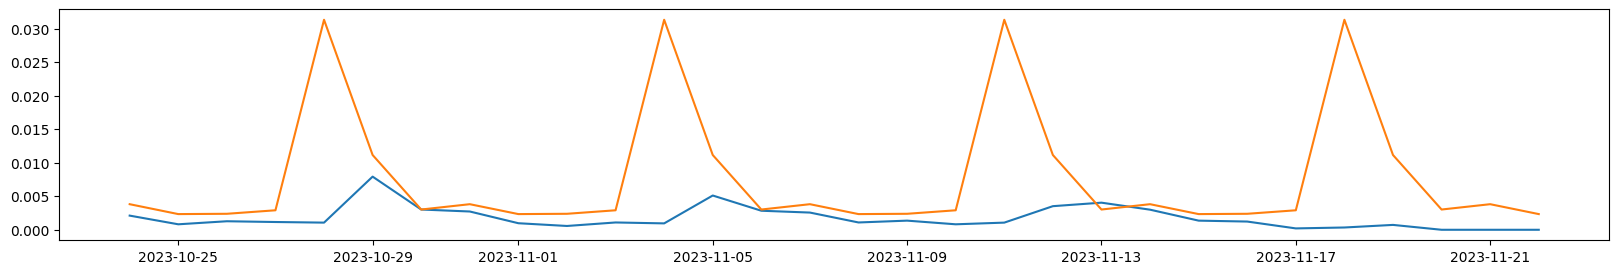

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(test[target_column])
ax.plot(prediction.forecast)

RMSE of results

In [ ]:
test[target_column].mean()
rmse = sqrt(mean_squared_error(prediction.forecast, test[target_column]))
print(rmse)

0.011534099600428597
